# Description of the data

Notes:

Source: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

Description of columns taken from the website

- RowNumber—corresponds to the record (row) number and has no effect on the output.
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.

- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.

- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.

- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.

- Points Earned—the points earned by the customer for using credit card.

Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.
It is advantageous for banks to know what leads a client towards the decision to leave the company.
Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.


# Libraries and Loading the data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats # for Q-Q plots
from scipy.stats import ttest_ind # For t-tests


In [2]:
df = pd.read_csv(r"C:\Users\alexa\OneDrive\AlexPerez\Dokumente\2 Soros\Data Science\Projects\customer_churn_Dec24\data\raw\Customer-Churn-Records.csv")

display(df.head())
display(df.info())
display(df.describe())

display(df.isnull().sum())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

# Preprocessing

In [3]:
# Checking for duplicates of columns that will potentially be deleted

duplicates = df[df.duplicated(subset=['RowNumber', 'CustomerId'], keep=False)]

print(duplicates)

# Removing columns irrelevantf or analysis 

df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis = 1)

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Complain, Satisfaction Score, Card Type, Point Earned]
Index: []


# Exploratory Data Analysis


In [4]:
display(df.head())
display(df.info())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

None

## Categorical variables: Geography, Gender and Card Type

In [5]:
unique_geo = df['Geography'].unique()
print(unique_geo)

['France' 'Spain' 'Germany']


C:\Users\alexa\AppData\Local\Temp\ipykernel_12420\306812502.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Geography', data = df, palette='viridis')


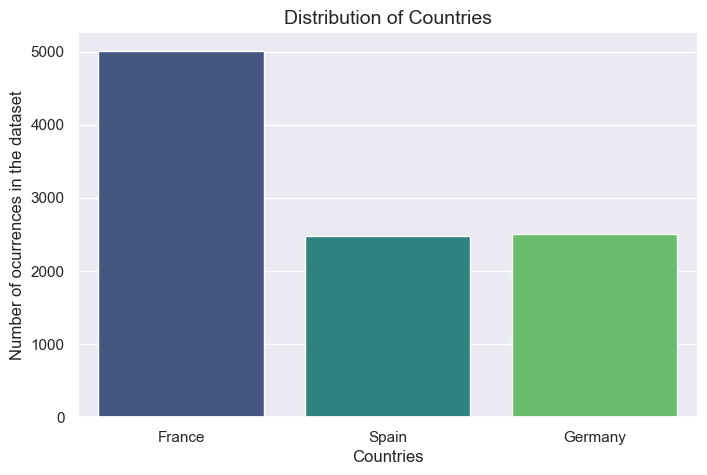

In [6]:
sns.set_theme()

plt.figure(figsize=(8,5))
sns.countplot(x='Geography', data = df, palette='viridis')

plt.title("Distribution of Countries", fontsize = 14)
plt.xlabel ('Countries', fontsize = 12)
plt.ylabel ('Number of ocurrences in the dataset', fontsize = 12)

plt.show()

# France dominates the dataset, accounting for more than half of the entries, with Spain and Germany contributing significantly less.
# The imbalance could influence the performance of the model, as the model may be biased towards the patterns seen in French customers, which are less present in Spain or Germany.
# Mitigation techniques to be tested: Stratified sampling during train-test splits ensuring balanced class weights OR undersampling. 

C:\Users\alexa\AppData\Local\Temp\ipykernel_12420\4925277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = df, palette='deep')


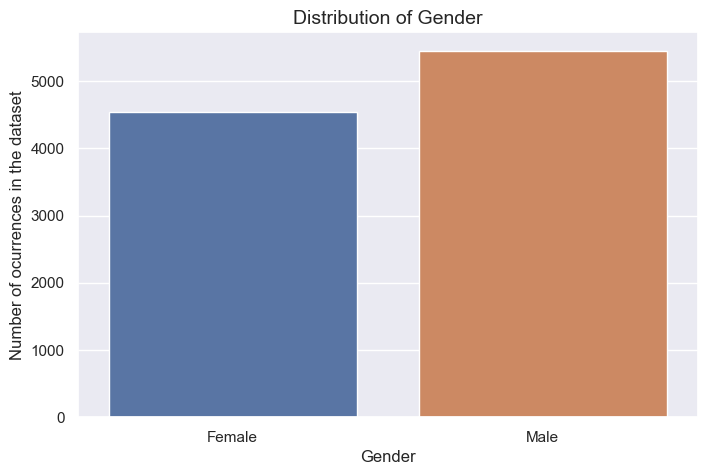

In [7]:
plt.figure(figsize = (8,5))

sns.countplot(x = 'Gender', data = df, palette='deep')
plt.title('Distribution of Gender', fontsize = 14)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Number of ocurrences in the dataset', fontsize = 12)
plt.show()

# The dataset is slightly imbalanced. Before thinking about mitigation techniques, let's conduct first a short analysis to see if mitigation is warranted

In [8]:
# Do churn rates by gender differ? Here the mean function calculates the proportion of 1's.

# Proportion of churned customers (churn rate)
churn_rate_by_gender = df.groupby('Gender')['Exited'].mean()

# Absolute count of churned customers
churn_count_by_gender = df.groupby('Gender')['Exited'].sum()

# Total count of customers in each group (for comparison)
total_count_by_gender = df.groupby('Gender')['Exited'].count()

# Display results
print("Churn rate by gender:")
print(churn_rate_by_gender)
print("\nCount of churned customers by gender:")
print(churn_count_by_gender)
print("\nTotal customers by gender:")
print(total_count_by_gender)

# Even females are underrepresented, they proportion of exits are 9 point higher than the ones of males. 
# Less conclude at this stage that no mitigation is needed. BUT, later on, further checks will be needed (i.a. Feature Importance Anlysis, Model Bias Assessment, Fairness Metrics)

Churn rate by gender:
Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64

Count of churned customers by gender:
Gender
Female    1139
Male       899
Name: Exited, dtype: int64

Total customers by gender:
Gender
Female    4543
Male      5457
Name: Exited, dtype: int64


Unique card types ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


C:\Users\alexa\AppData\Local\Temp\ipykernel_12420\3801394593.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Card Type', data = df, palette='deep')


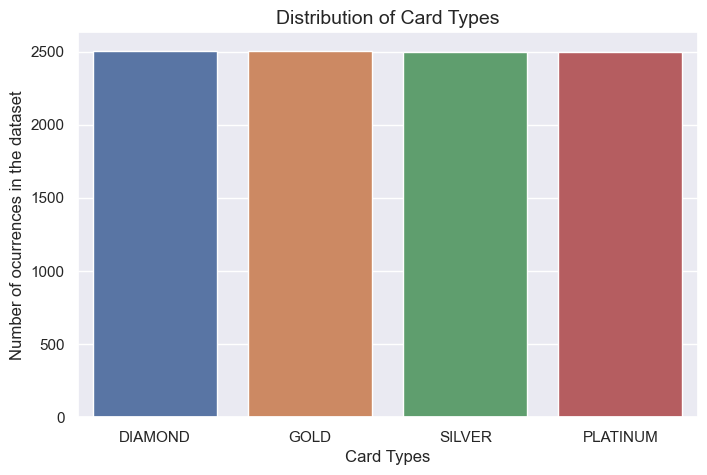

In [9]:
# Checking how many card types are there

print('Unique card types', df['Card Type'].unique())

plt.figure(figsize = (8,5))

sns.countplot(x = 'Card Type', data = df, palette='deep')
plt.title('Distribution of Card Types', fontsize = 14)
plt.xlabel('Card Types', fontsize = 12)
plt.ylabel('Number of ocurrences in the dataset', fontsize = 12)
plt.show()

# Perfectly balanced. 

C:\Users\alexa\AppData\Local\Temp\ipykernel_12420\3941269384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Gender", y="Age", data=df, palette="pastel", ax=axes[0])


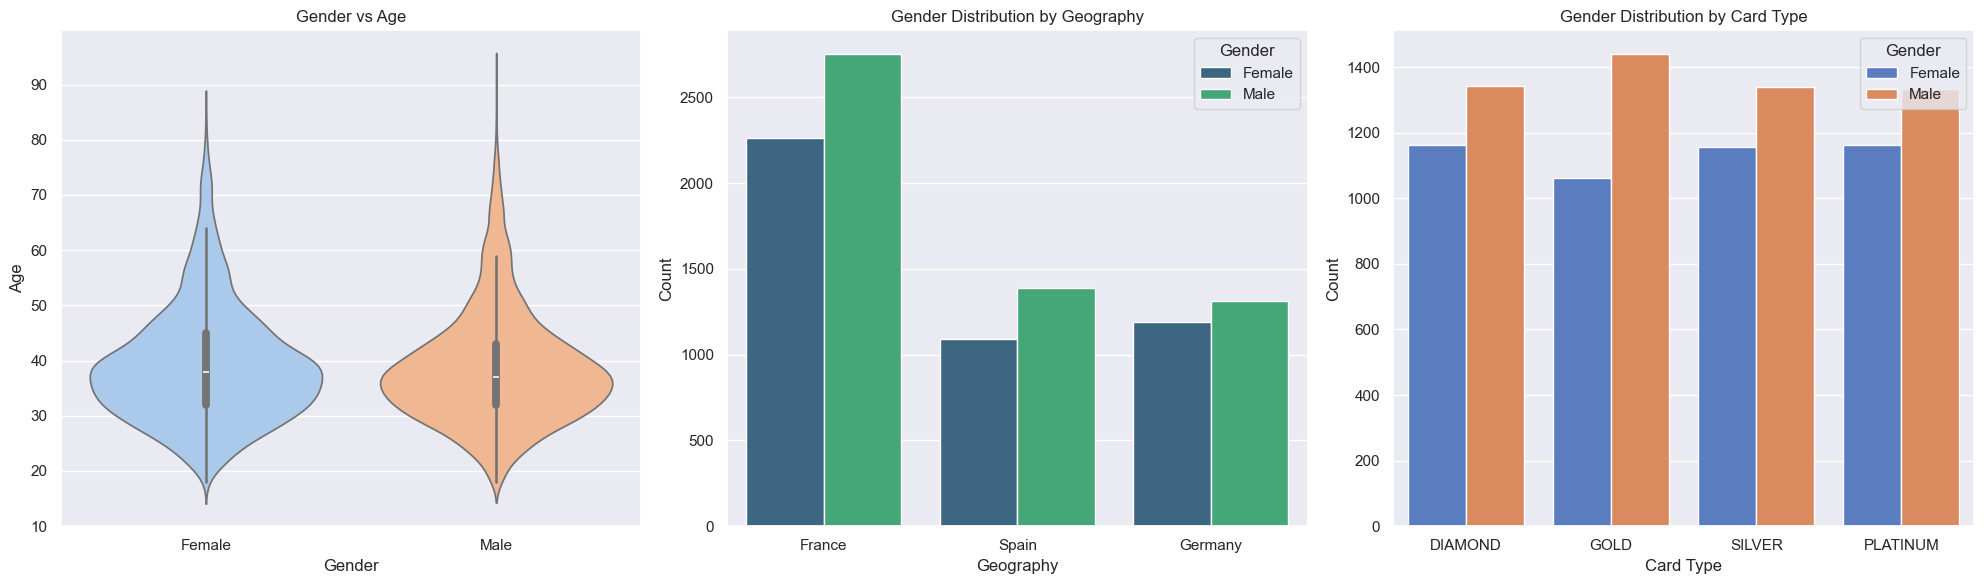

In [10]:
# Visualizing relations of categorical variables and age

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns of subplots

# Plot 1: Gender vs Age (using boxplot for distribution)
sns.violinplot(x="Gender", y="Age", data=df, palette="pastel", ax=axes[0])
axes[0].set_title("Gender vs Age")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Age")

# Plot 2: Gender vs Geography (using countplot for categorical comparison)
sns.countplot(x="Geography", hue="Gender", data=df, palette="viridis", ax=axes[1])
axes[1].set_title("Gender Distribution by Geography")
axes[1].set_xlabel("Geography")
axes[1].set_ylabel("Count")

# Plot 3: Gender vs Card Type (using countplot for categorical comparison)
sns.countplot(x="Card Type", hue="Gender", data=df, palette="muted", ax=axes[2])
axes[2].set_title("Gender Distribution by Card Type")
axes[2].set_xlabel("Card Type")
axes[2].set_ylabel("Count")

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [ ]:
# Gender distribution by Age (Violin plot) 
# it displays the distribution of ages for both genders. Width of violin represents the density of data points and KDE gives an estimate of the distribution
# Males: Symmetrical with a peak density inthe age range 30-40. It shows a larger spread from 50 on
# Females: Like males, higher density in the age range 30-40. Tails seem slightly thinner than in males.
# Age is fairly consistent across genders. 

# Gender distribution by Geography. It shows again a predominance of males in each country. 

# Gender distribution by Card Type 
# Accross all card types males appear slightly more dominant than females. 
# Gold are particularly popular among males 

## Numerical Variables

## Univariate analysis - non-binary variables

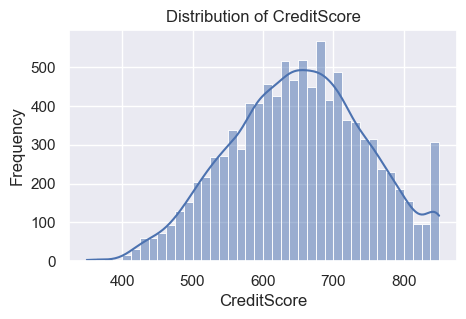

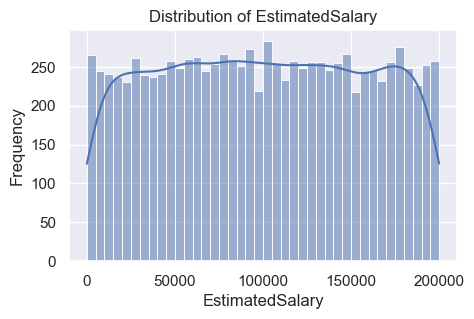

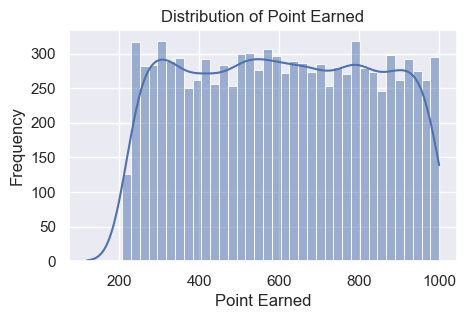

In [4]:
# Distributions - Histograms

sns.set_theme()

num_vars = ['CreditScore', 'EstimatedSalary', 'Point Earned']

for var in num_vars:
    plt.figure(figsize = (5,3))
    sns.histplot(x=var, kde = True, bins= 40, data=df)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


# Credit score: it has an approximated bell-shaped form, which indicates a normal distribution. 
# Estimated Salary and Points Earned is uniform-like - evenly distributed.

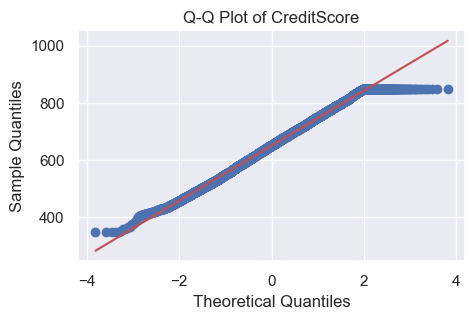

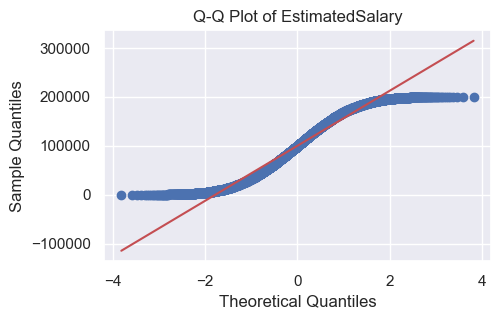

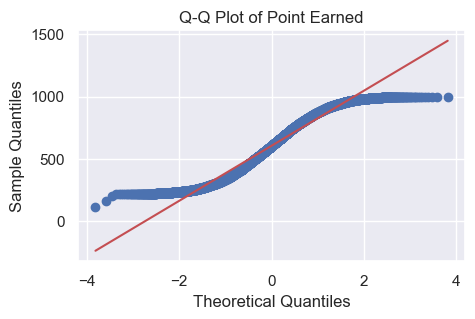

In [ ]:
# Are these normal distributions?

for var in num_vars:
    plt.figure(figsize=(5, 3))
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {var}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()


# As alredy mentioned, CrediScore distribution is approximately normal (save for the tails). 
# That means, depending of the models chosen and their sensitivity to normality, no transformation will be needed.
# In contrast, Estimated Salary and Points Earned are not normal but rather evenly distributed. 

## Note: 
# Logistic Regression, Linear Discriminant Analysis and Naive Bayes assume that features are normally distributed.
# Tree-Based Models (DT, RF and Boosting models), K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) and Neural are insensitive to distribution.    

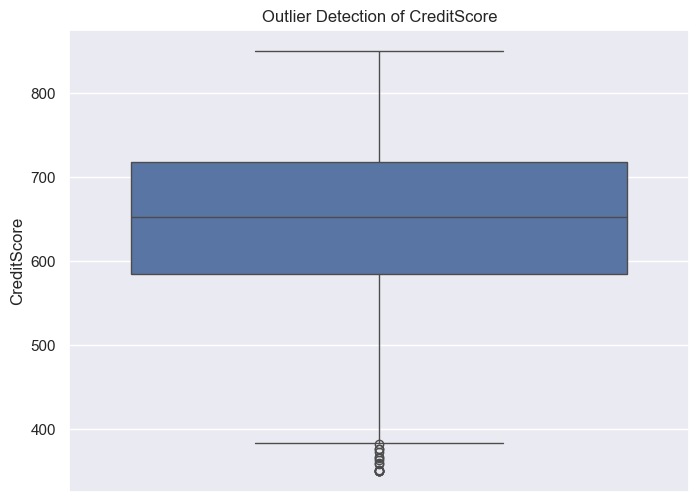

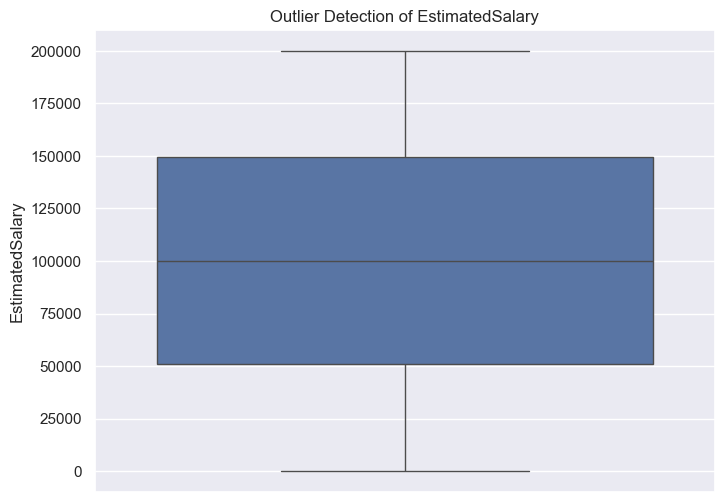

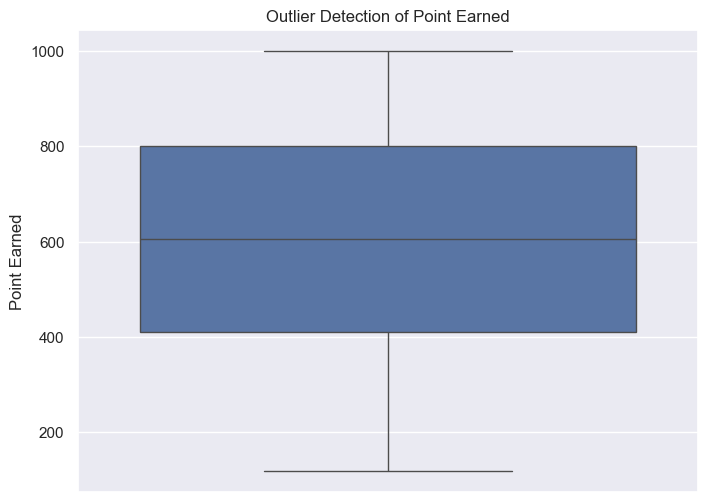

In [ ]:

num_vars = ['CreditScore', 'EstimatedSalary', 'Point Earned']

for var in num_vars:
    plt.figure(figsize = (8,6))
    sns.boxplot(y=var, data=df)
    plt.title(f"Outlier Detection of {var}")
    plt.ylabel(var)
    plt.show()

# Estimated salary and Point Earned are variables that may have been capped by the data provider. In any case, it does not show outliers.
# CreditScore has customers with very low credit scores (< 400). Here the min value is 350 and the max value is 850. 
# Assuming these outliers are not errors (data entry ones), I may keep them, as they can influence churn. However, this also depends on the ml model selected.
# Let's see if low credit scores are related to churn.

In [ ]:
# Correlation between Creditscore and churn (Exited column)

churn_analysis = df.groupby('Exited')['CreditScore'].mean()

print("Average CreditScore by Churn Status:")
print(churn_analysis)

# The difference in average credit scores is quite small (6 points), however, to see if there is a significance a statistical test should be done (i.a. t-test).
# More formally, less test the null Hypothesis: "There is no significat difference in the mean credit scores of churned and non-churned customers"

Average CreditScore by Churn Status:
Exited
0    651.837855
1    645.414622
Name: CreditScore, dtype: float64


In [ ]:

# Separate the data into two groups
churned_scores = df[df['Exited'] == 1]['CreditScore']  # Customers who churned
stayed_scores = df[df['Exited'] == 0]['CreditScore']  # Customers who stayed

# Perform t-test
t_stat, p_value = ttest_ind(churned_scores, stayed_scores, equal_var=True)

# Output the results
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("There is a statistically significant difference in means (reject H₀).")
else:
    print("There is no statistically significant difference in means (fail to reject H₀).")

# Since P-value is < 0.05 it means there is a statistically significant difference in the mean credit scores between customers who churned and those who stayed. 
# That is, we have proven that credit scores are related to churn. 

# Since outliers impacts churn and they are assumed to be not errors in data entry, I will retain them, so that the model learns from the entire dataset range.

T-statistic: -2.678, P-value: 0.007
There is a statistically significant difference in means (reject H₀).


## Multivariate analysis - non-binary variables and other discrete variables

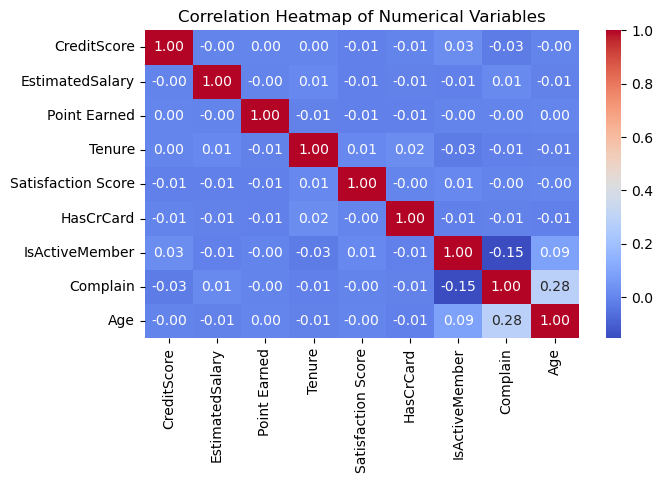

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all numerical columns
numerical_columns = ['CreditScore', 'EstimatedSalary', 'Point Earned', 
                     'Tenure', 'Satisfaction Score', 'HasCrCard', 
                     'IsActiveMember', 'Complain', 'Age']

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Thoughts about the correlation heatmap:
# Correlation is most meaningful for continous variables (CreditScore, EstimatedSalary and Point Earned) becuase it measures the strenght of a linear relationship.
# Discrete numerical variables such as Tenure and Satisfaction Score can contribute to the heatmap if treated as ordinal values.
# Binary variables such as HasCrCard, IsActiveMember and Complain can be included as correlation coefficients can measure their linear relationship with other variables, however
# the correlation values may have limited interpretability. 

# Results:
# There are no strong linear correlations between the numerical variables in the dataset, which seems unusual for a real-world dataset. 
# It is also unusual that variables, which should show a strong correlation (e.g. Estimated Salary and Credit Score or Age and Estimated Salary) do not show any.
# Potential explanations:
# The dataset might have been pre-processed in order to remove linear relationships AND/OR the variables could have non-linear patters (correlation coefficients do not capture them).
# It seems to me that the data set was manipuated in order to avoid reverse engineering.

# Anyways, let's see check for potential non-linear relationships using scatter and pairplots. 

<Figure size 800x500 with 0 Axes>

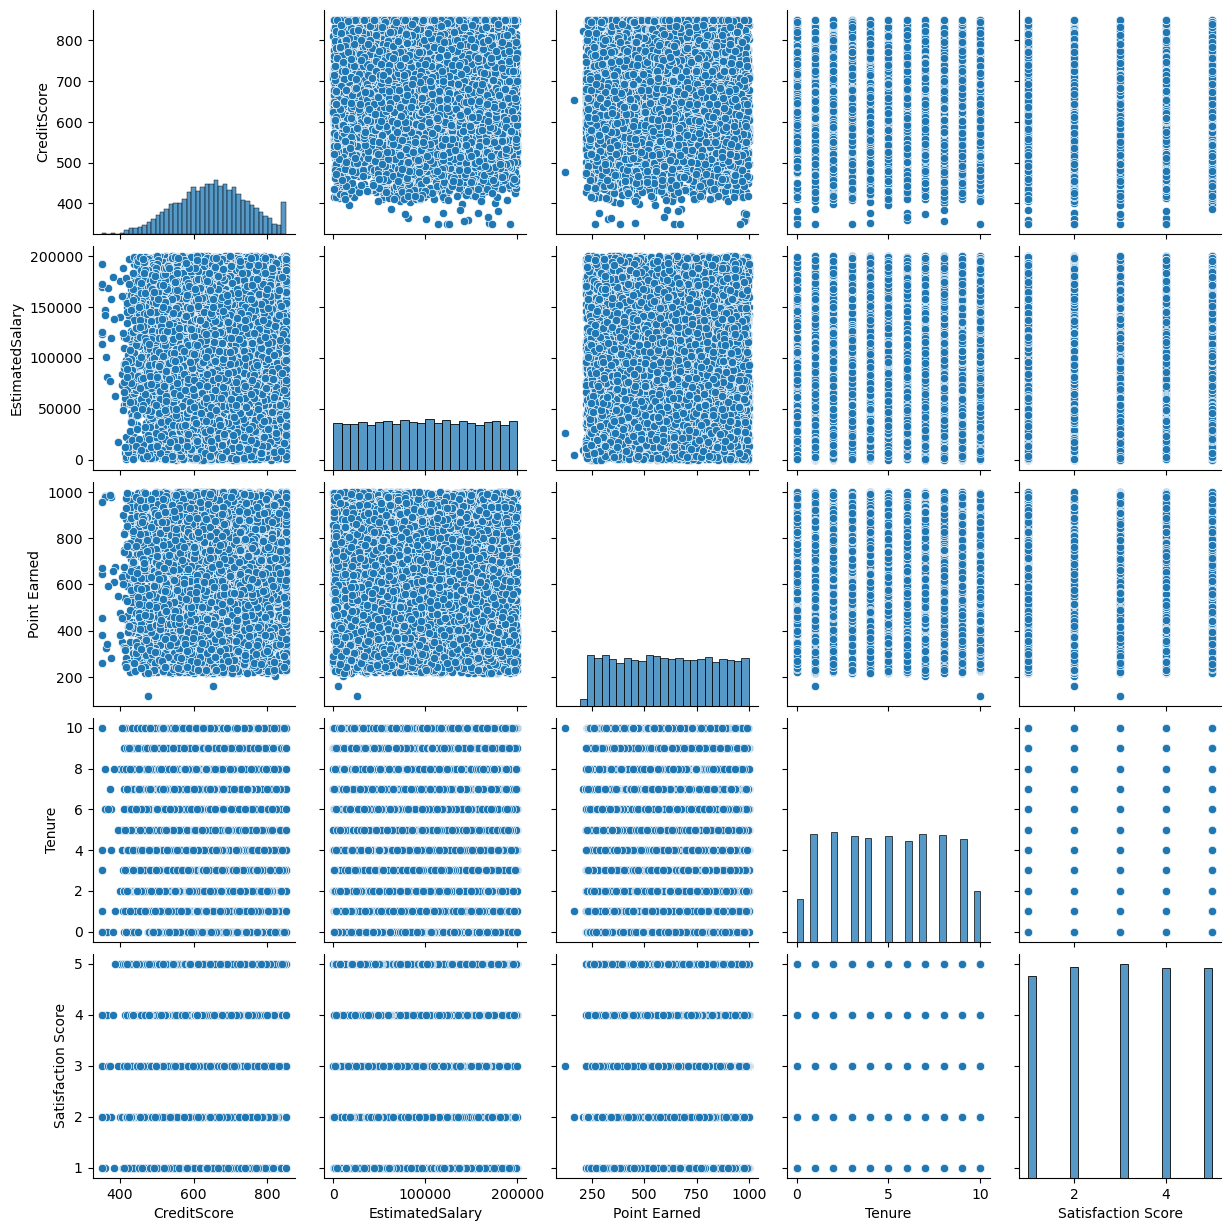

In [ ]:
figure = plt.figure(figsize=(8,5))
sns.pairplot(df, vars=['CreditScore', 'EstimatedSalary', 'Point Earned', 'Tenure', 'Satisfaction Score'])
plt.show()


# Results
# Besides visualizing some outliers (Credit Score vs Point Earned), there are not strong patterns shown in the scatter plots, as they mostly appear as arandom cloud of points.
# Discrete variables (Tenure and Satisfaction score) appear as vertical or horizontal bands dues to their discrete nature.

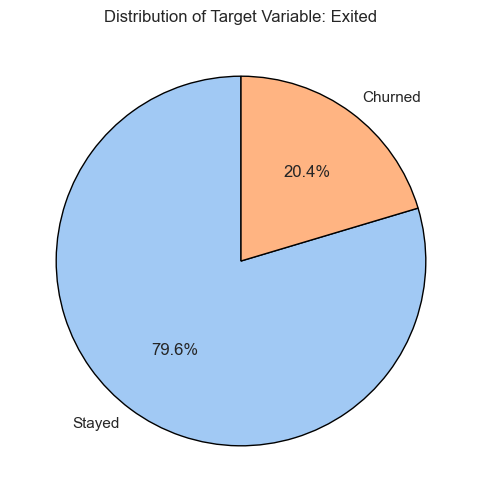

In [ ]:
# Finally, let's see the distribution of the target variable

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Calculate proportions for the target variable
target_counts = df['Exited'].value_counts()
labels = target_counts.index
sizes = target_counts.values
colors = sns.color_palette("pastel")[0:2]  # Use a pastel color palette

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes, 
    labels=['Stayed', 'Churned'],  # Replace 0 and 1 with meaningful labels
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Distribution of Target Variable: Exited")
plt.show()

# The graph shows an imbalanced dataset regarding the target variable. 
# Since ml algorithms assume balanced classes, imbalanced datasets can negatively affect the model performance.
# Some mitigation strategies will need to be performed, for example: 
# Synthetic Minority Oversampling, that is, oversampling the minority class (Churned). This is preferred instead of downsampling the majority class, so as to not loose to much information. 
# Selection of algorithms which are more robust to class imbalance (Tree-Based Models and K-Nearest Neighbors),
# Use of class weight,such as assigning a higher weith to the minority class to penalized the model more for misclassifying it.
# Also stratifiend sampling during Train-Tests Splits, hence ensuring that the training and testing datasets maintain the same class proportionsas the original dataset. 

